In [10]:
import os
os.chdir("/workspace/ModelPreferences")
import eloLLMPrefs as elo
from importlib import reload
import matplotlib.pyplot as plt
import numpy as np
reload(elo)
import cloudpickle
import random

In [3]:
with open("chonkers/reslargeall100000.pkl", "rb") as f:
    chunked = cloudpickle.load(f)

#with open("chonkers/better40000NopeOut.pkl", "rb") as f:
#    llmInputs, bailResults, bailProbs = cloudpickle.load(f)

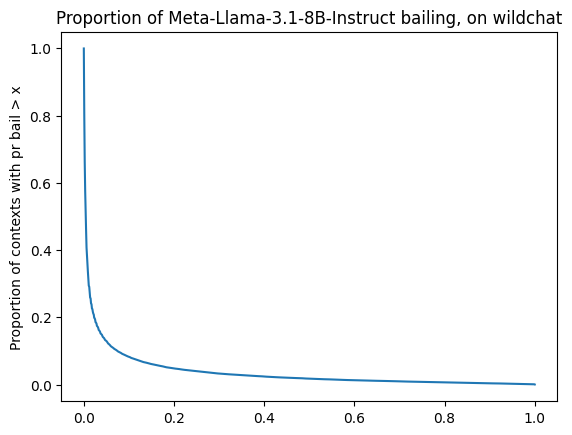

In [4]:
X = np.linspace(0, 1.0, 1000)
Y = np.array([len([x for x in bailProbs if x[0]>p])/float(len(bailProbs)) for p in X])
plt.plot(X, Y)
plt.ylabel('Proportion of contexts with pr bail > x') 
plt.title('Proportion of Meta-Llama-3.1-8B-Instruct bailing, on wildchat')
plt.show()

In [9]:
for p in np.linspace(0, 1.0, 30):
    proportionBail = len([x for x in bailProbs if x[0]>p])/float(len(bailProbs))
    print(f"In {round(proportionBail*10000)/100}% of data, model prefers to bail {round(p*100*10)/10}% or more of the time")

In 99.95% of data, model prefers to bail 0.0% or more of the time
In 16.03% of data, model prefers to bail 3.4% or more of the time
In 10.51% of data, model prefers to bail 6.9% or more of the time
In 8.06% of data, model prefers to bail 10.3% or more of the time
In 6.51% of data, model prefers to bail 13.8% or more of the time
In 5.47% of data, model prefers to bail 17.2% or more of the time
In 4.69% of data, model prefers to bail 20.7% or more of the time
In 4.07% of data, model prefers to bail 24.1% or more of the time
In 3.58% of data, model prefers to bail 27.6% or more of the time
In 3.16% of data, model prefers to bail 31.0% or more of the time
In 2.83% of data, model prefers to bail 34.5% or more of the time
In 2.54% of data, model prefers to bail 37.9% or more of the time
In 2.28% of data, model prefers to bail 41.4% or more of the time
In 2.05% of data, model prefers to bail 44.8% or more of the time
In 1.87% of data, model prefers to bail 48.3% or more of the time
In 1.65% o

# Load embedding model

In [3]:
emb = elo.SentenceTransformer("jxm/cde-small-v2", trust_remote_code=True)
minicorpus_size = emb[0].config.transductive_corpus_size
minicorpus = []
random.seed(27)
while len(minicorpus) < minicorpus_size:
    minicorpus.append(random.choice(llmInputs))
dataset_embeddings = emb.encode(
    minicorpus,
    prompt_name="document",
    convert_to_tensor=True
)

Disabled 23 dropout modules from model type <class 'transformers_modules.jxm.cde-small-v2.287bf0ea6ebfecf2339762d0ef28fb846959a8f2.model.BiEncoder'>
Disabled 46 dropout modules from model type <class 'transformers_modules.jxm.cde-small-v2.287bf0ea6ebfecf2339762d0ef28fb846959a8f2.model.ContextualDocumentEmbeddingTransformer'>


In [11]:
llmInputs[0]

"<|begin_of_text|><|start_header_id|>system<|end_header_id|>\n\nCutting Knowledge Date: December 2023\nToday Date: 26 Jul 2024\n\n<|eot_id|><|start_header_id|>user<|end_header_id|>\n\nConsider a game in which balls are divided among three boxes. First, I choose a box from among the three boxes, and then I choose ball at random from that particular box. Box 1 contains 1 white and 3 black ball; Box 2 contains 2 white and 2 black ball; Box 3 contains 3 white and 1 black ball. After you see what color ball I pick, you guess which Box I chose from, and the game is played over and over. Your objective is to guess the box correctly as often as possible.\n(a) Suppose you know that I pick a box at random with probability (1/3, 1/3, 1/3). Your strategy is to guess the box with highest posterior probability given the observed color. What fraction of the time are you likely to be correct?\n(b) Suppose you use the guessing strategy from (a), but I was in fact randomizing with probabilities (1/4, 1/

In [7]:
print(dataset_embeddings.shape)
def batchFun(start, end):
    return [x for x in emb.encode(llmInputs[start:end], prompt_name="document", dataset_embeddings=dataset_embeddings, convert_to_tensor=True)]

embeddings = elo.runBatched(batchFun, len(llmInputs), 1000, noCancel=True)
 

torch.Size([512, 768])
0 / 100234 12.235 millis per prompt 20 minutes 14 seconds done at 02:46:14 PM
1000 / 100234 12.066 millis per prompt 19 minutes 45 seconds done at 02:45:57 PM
2000 / 100234 12.103333333333333 millis per prompt 19 minutes 36 seconds done at 02:46:01 PM
3000 / 100234 12.1155 millis per prompt 19 minutes 25 seconds done at 02:46:02 PM
4000 / 100234 12.0976 millis per prompt 19 minutes 12 seconds done at 02:46:00 PM
5000 / 100234 12.112833333333333 millis per prompt 19 minutes 1 second done at 02:46:02 PM
6000 / 100234 12.121857142857143 millis per prompt 18 minutes 50 seconds done at 02:46:03 PM
7000 / 100234 12.123875 millis per prompt 18 minutes 38 seconds done at 02:46:03 PM
8000 / 100234 12.101333333333333 millis per prompt 18 minutes 24 seconds done at 02:46:01 PM
9000 / 100234 12.1197 millis per prompt 18 minutes 13 seconds done at 02:46:03 PM
10000 / 100234 12.137181818181817 millis per prompt 18 minutes 3 seconds done at 02:46:04 PM
11000 / 100234 12.1338333

In [8]:
import torch
resultEmbeddings = torch.stack(embeddings)
#torch.save(resultEmbeddings, "chonkers/bailExperimentEmbeddings.pkl")

In [2]:
resultEmbeddings = torch.load("chonkers/bailExperimentEmbeddings.pkl")
import umap
reducer = umap.UMAP(n_components=2)
reducedEmbeddings = reducer.fit_transform(resultEmbeddings.cpu().numpy())

NameError: name 'torch' is not defined